<a href="https://colab.research.google.com/github/jaytrey777/Coding-Dojo-Food-Sales-Predictions/blob/main/Jason_Tracey_Project_1_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science - Big Mart Sales Prediction Data

Jason R. Tracey

# Project 1 - Part 1

Part 1:

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

# Project 1 - Part 2

We will continue to work off of the GitHub repository you created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it.  As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

- Download the data using this link: download the data. (Note: Original data source).
- Insert code below the heading "Loading Data"
  - Use Pandas to read the sales prediction data set into Google Colab.
  - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
  - Explore the data - what do you need to do to clean this data? Clean it!
  - Be sure to address each of the following tasks:

**Questions:**
1. How many rows and columns?

2. What are the datatypes of each variable?

3. Are there duplicates? If so, drop any duplicates.

4. Identify missing values.

5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6. Confirm that there are no missing values after addressing them.

7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

Link to the original dataset:

https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

Data Dictionary for the Data Set

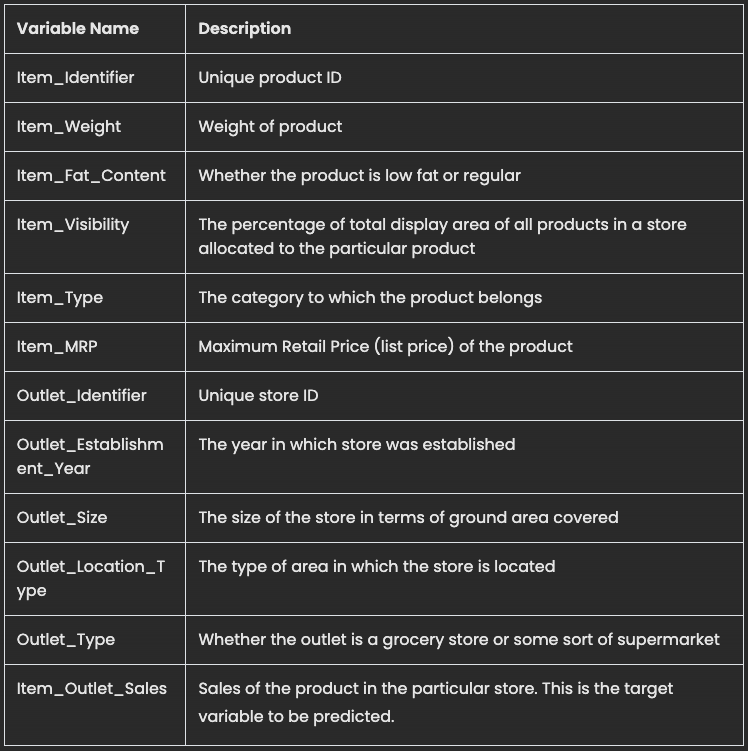

## Imports & Drive Mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


## Loading Data

In [2]:
filename = '/content/drive/MyDrive/Colab Notebooks/02 Week 2: Pandas - 3.6.23 & 3.8.23/5. Core Assignments/sales_predictions.csv'
df = pd.read_csv(filename)

In [3]:
df.head() #check to make sure data was uploaded properly

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info() #gather info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning


####1. How many rows and columns?

In [5]:
df.shape #gives me rows and columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this data set")

There are 8523 rows and 12 columns in this data set


####2. What are the datatypes of each variable?

In [6]:
df.dtypes #shows data types stored in each column
for col in df:
  print(f'Column {col} is a {df[col].dtypes}')
  print()

Column Item_Identifier is a object

Column Item_Weight is a float64

Column Item_Fat_Content is a object

Column Item_Visibility is a float64

Column Item_Type is a object

Column Item_MRP is a float64

Column Outlet_Identifier is a object

Column Outlet_Establishment_Year is a int64

Column Outlet_Size is a object

Column Outlet_Location_Type is a object

Column Outlet_Type is a object

Column Item_Outlet_Sales is a float64



####3. Are there duplicates? If so, drop any duplicates.

In [7]:
df.duplicated().sum() #obtain any duplicated rows and add the boolean outputs to see how many rows there are
#df.drop_duplicates() 

0

- There are no duplicate rows in the data.  So there was no need to drop any from the data set. 

- Taking a peek at the number of unique items in each column.  This may be useful later.

In [8]:
df.nunique() # number of unique items in each column

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

####4. Identify missing values.

In [9]:
print(df.isna().sum()) #obtain any missing data (i.e NaN) and add them to see how many rows contain it in every column.
#df.drop_duplicates() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


- Based on the search for missing data, there are:
  - 1463 empty cells in the `Item_Weight` column
  - 2410 empty cells in the `Outlet_Size` column

####5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

- I calculated the percentage of missing data to see if the columns are able to be dropped.

In [10]:
df.isna().sum() / len(df) * 100 #gets the percentage of missing data for each column

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Taking a look at the columns with missing data to see what information I can gather. 

In [11]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [12]:
df['Outlet_Size'].describe(include = 'object')

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

- I will set all the `NaN` values to `zero` in the `'Item_Weight'` column and begin to analyze the data.

In [13]:
df["Item_Weight"].fillna(value = 0, inplace = True)

- For every unique `Item_Identifier` I am going to get the `average weight` for the items using the data in the `Item_Weight` column. Once I have the average weight, I will set all the zero weights to that value for that unique `Item_Identifier`. After I will check to confirm the missing values have been replaced.

In [14]:
counter = 0
a = len(df[df["Item_Weight"] == 0])
b = 0
for name in df["Item_Identifier"]:
  filtered = df[df["Item_Identifier"] == name]
  x = filtered["Item_Weight"].mean()
  if df.iloc[counter,1] == 0:
    df.iat[counter , 1] = x
    if df.iloc[counter,1] != 0:
      b += 1
  counter += 1
print(f"Out of the {counter} rows analyzed, I have replaced {b} pieces of the {a} pieces missing data. There are {a-b} rows that still need to be addressed.")

Out of the 8523 rows analyzed, I have replaced 1459 pieces of the 1463 pieces missing data. There are 4 rows that still need to be addressed.


- Now that I have analyzed the `'Item_Identifier'` column by replacing any zeroes with the corresponding `'Item_Identifier'`, I need to filter my data for any remaining `zeroes`.

In [15]:
df[df['Item_Weight'] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,0.0,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,0.0,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,0.0,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,0.0,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


- Since the data in this column is numerical, I can clean the data a few different ways. When analyzing numerical colums, dropping rows and columns have different consequences. A few of them are listed below:


- Based on the analysis, it seems best to impute the median value to the 4 missing values. Doing so to this small amount of data would have the least impact to the overall data set. 

In [16]:
counter = 0
a = len(df[df["Item_Weight"] == 0])
b = 0
for name in df["Item_Identifier"]:
  filtered = df[df["Item_Weight"] == 0]
  x = df["Item_Weight"].median()
  if df.iloc[counter,1] == 0:
    df.iat[counter , 1] = x
    if df.iloc[counter,1] != 0:
      b += 1
  counter += 1
print(f"Out of the {counter} rows analyzed, I have replaced {b} pieces of the {a} pieces missing data. There are {a-b} rows that still need to be addressed.")

Out of the 8523 rows analyzed, I have replaced 4 pieces of the 4 pieces missing data. There are 0 rows that still need to be addressed.


In [17]:
# delete_these_rows = [927,1922,4187,5022]

# for item in delete_these_rows:
#   df.drop(item, axis = 0, inplace = True)
df[df['Item_Weight'] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales



- For the `Outlet_Size` column, I noticed thathe outlet size is related the the `Outlet_Identifier` column. I need to see how many uinque items are in the `Outlet_Identifier` column. From there, I can filter to see which stores have missing vaules and compare and decide the best course of action. 

In [18]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [19]:
df_store_nan = df[df['Outlet_Size'].isna()] #all the stores without an Outlet Size

In [20]:
df_store_nan["Outlet_Identifier"].value_counts() #Get the counts of the stores that are missing data

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

- Looks like we are missing `Outlet_Size` data for 3 stores.  I want to replace the data with the text `'Missing'` because I dont want to assume the wrong size store. Having 3 stores say missing is not critical and wont skew the data too much with the stores are filtered by size. 

In [21]:
x = 'Missing'
df["Outlet_Size"].fillna(value = x, inplace = True)

#### 6. Confirm that there are no missing values after addressing them.

In [22]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- After a search again, I can confirm there are no missing values.

#### 7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

- Looking at the columns that contain objects, I need to analyze them and see if there are some I should investigate further. 

In [23]:
df.describe(include = 'object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


- I decided not to do the `Item_Identifier` column. That column has `1559` unique items and doesn't seem like it is necessary to analyze all `1559` items for differences.  

In [24]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- `Item_Fat_Content` has items in the column that are seemingly redundant. Based on the list, I want to replace `'low fat'` and `'LF'` with `'Low Fat'` as well as replace `'reg'` with `'Regular'` and check to make sure the changes were made.

In [25]:
df.replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'}, inplace = True)
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [27]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [28]:
df["Outlet_Size"].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [29]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [30]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

- None of the other columns have any data that needs to be looked at. All items have unique identifiers and are spelled correctly.  

#### 8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [31]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.372472,0.066132,140.992782,1997.831867,2181.288914
std,4.633512,0.051598,62.275067,8.371760,1706.499616
min,1.800000,0.000000,31.290000,1985.000000,33.290000
25%,8.365000,0.026989,93.826500,1987.000000,834.247400
50%,12.150000,0.053931,143.012800,1999.000000,1794.331000
75%,16.200000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- Here are the statistics for all of the numerical columns. We can use this to analyze data.

# Project 1 - Part 3

## Exploratory Visuals

We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the products and outlets that play crucial roles in increasing sales.

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

In [32]:
df.info() #Lets look at the data and the data types one more time...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


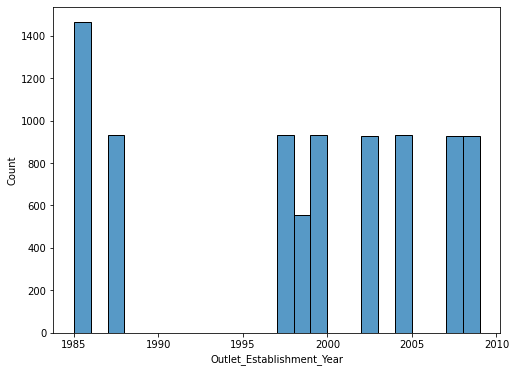

In [60]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.histplot(data = df, x = 'Outlet_Establishment_Year', bins = 24);

- This histogram shows that over `1400` stores were established in `1985`, but there were less than `600` established in `1998`. There were also no stores established between `1988` and `1997`, but there were a litte over `900` stores established all of the other years.

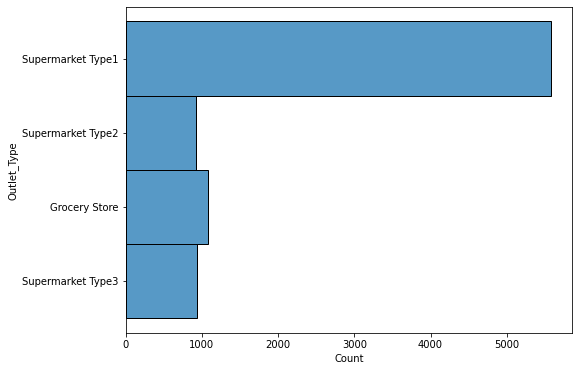

In [34]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.histplot(data = df, y = 'Outlet_Type');

This histogram shows that the majority of the stores are `Supermarket Type 1` with around `5500` stores. The 3 other types of stores only have around `1000` stores each.

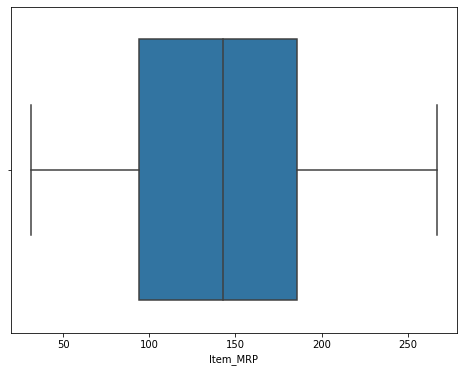

In [35]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.boxplot(data = df, x = 'Item_MRP')

- This boxplot shows that the median price is a little less that `$150` where the majority of the prices are between `$90` and `$190`. The max pirce is around `$260` and the minimum price is around `$30`.

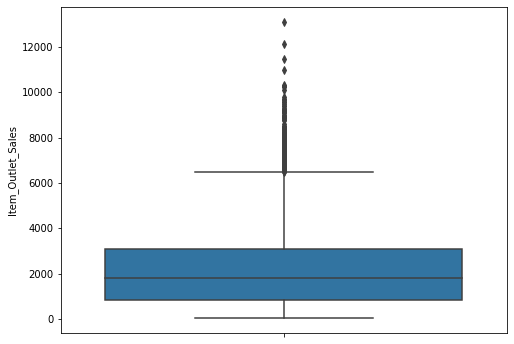

In [36]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.boxplot(data = df, y = 'Item_Outlet_Sales')

- This boxplot shows that the median sales for the stores is around `1800 units` and the majority of the stores sell between `800` and `3000 units`.  

In [37]:
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.031946,0.027746,0.152942,-0.002049
Item_Visibility,-0.031946,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027746,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.152942,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.002049,-0.128625,0.567574,-0.049135,1.000000


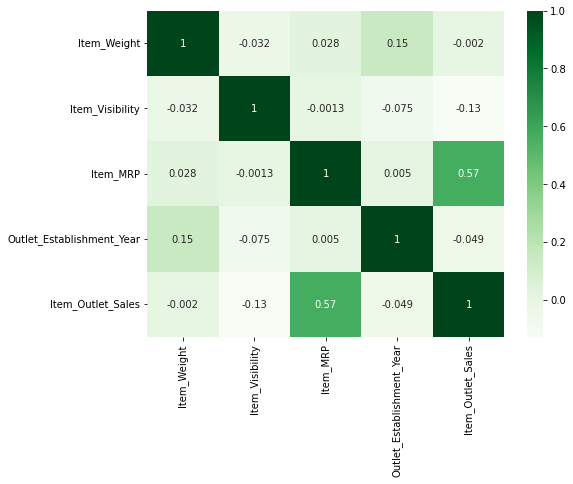

In [38]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.heatmap(corr, cmap= 'Greens', annot = True)

This heatmap shows there arent many correlations between the data. The `Outlet Sales` and `MRP` have a `moderate positive correlation` suggesting that as a store sales more of a certain item the price of the item increases.

# Project 1 - Part 4

## Explanatory Visuals

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 4, your task is to build several data visualizations to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

- Build on your previous cleaning, exploration, and analysis.
- Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
- Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


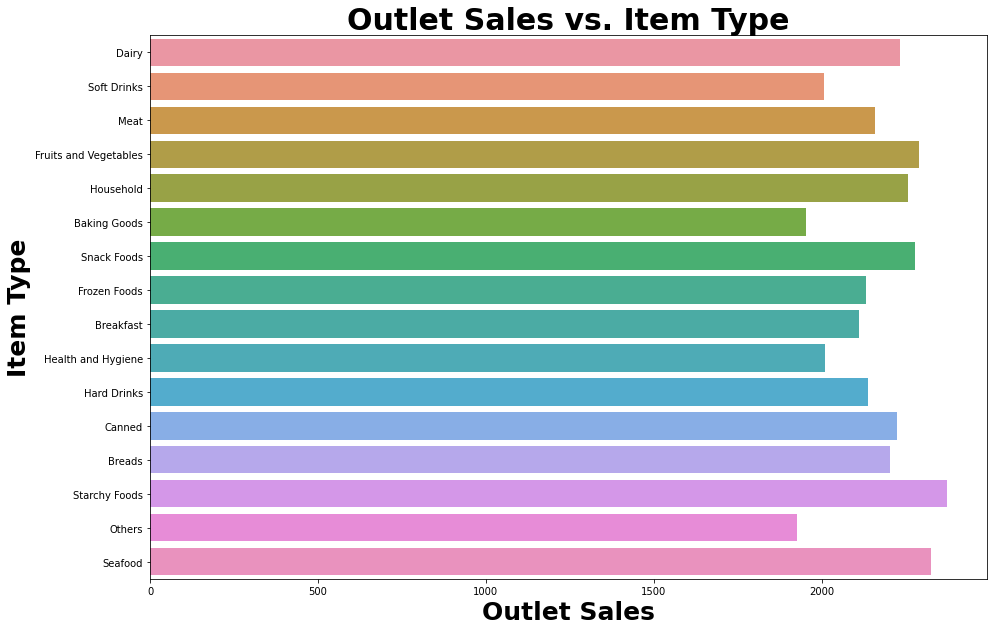

In [78]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.barplot(data = df, x = 'Item_Outlet_Sales', y ='Item_Type', ci = None);

ax.set_title('Outlet Sales vs. Item Type', fontsize = 30, fontweight = 'bold');
ax.set_xlabel('Outlet Sales', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Item Type', fontsize = 25, fontweight = 'bold');



- This `barchart` shows that the most sold item is `starchy foods` and the least is `other` types of food. This barchart shows that the type of food does not influence sales a lot as there is not one category that is a far and away leader.

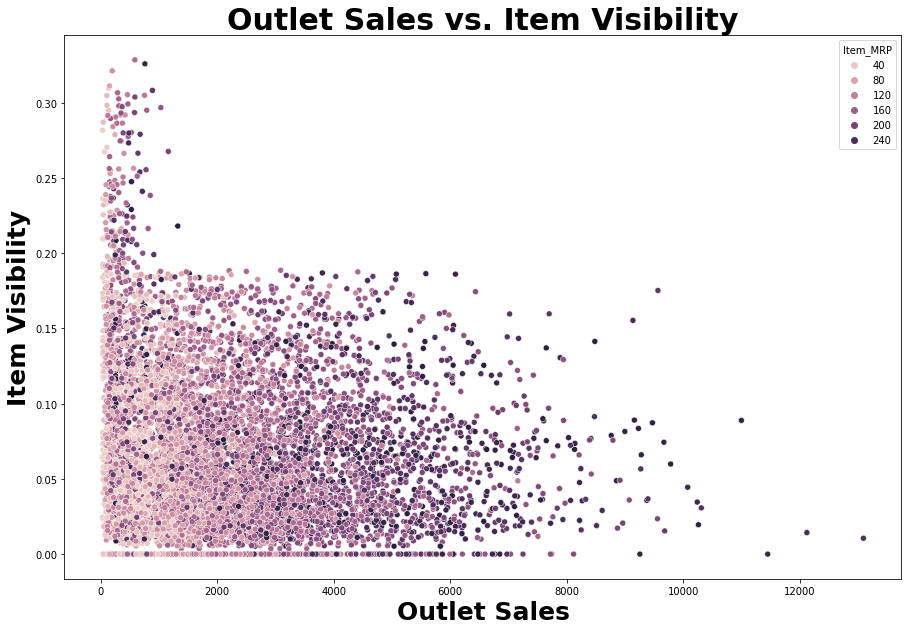

In [104]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.scatterplot(data = df, x = 'Item_Outlet_Sales', y ='Item_Visibility', hue= 'Item_MRP');

ax.set_title('Outlet Sales vs. Item Visibility', fontsize = 30, fontweight = 'bold');
ax.set_xlabel('Outlet Sales', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Item Visibility', fontsize = 25, fontweight = 'bold');

- This `Scatter Plot` shows there is `no direct correlation` between the `visibility of items` in outlets and the `sales` of the item.  It seems people buy what they need no matter the price or how visible the item is.

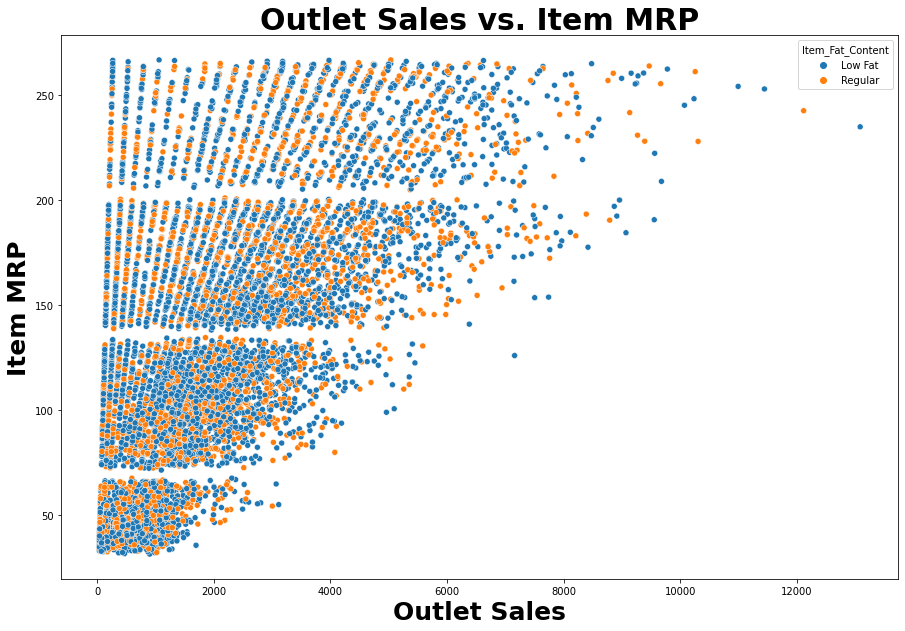

In [96]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.scatterplot(data = df, x = 'Item_Outlet_Sales', y ='Item_MRP', hue = 'Item_Fat_Content');

ax.set_title('Outlet Sales vs. Item MRP', fontsize = 30, fontweight = 'bold');
ax.set_xlabel('Outlet Sales', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Item MRP', fontsize = 25, fontweight = 'bold');

- This `Scatter Plot` shows that there is a `small positive correlation` between the `outlet sales` and the `price of items`. There is also not a strong correlation betweeen the `fat content` and the `price` or `sales`. 

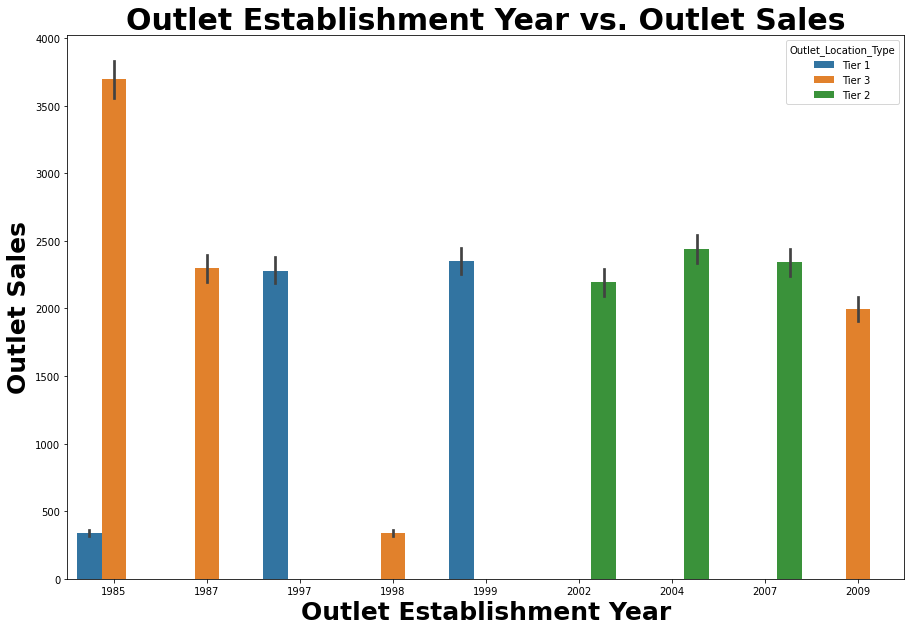

In [105]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.barplot(data = df, x = 'Outlet_Establishment_Year', y ='Item_Outlet_Sales', hue = 'Outlet_Location_Type');

ax.set_title('Outlet Establishment Year vs. Outlet Sales', fontsize = 30, fontweight = 'bold');
ax.set_xlabel('Outlet Establishment Year', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Outlet Sales', fontsize = 25, fontweight = 'bold');

This `Bar Graph` shows that the store that was established in `1985` is `Tier 3` and has the `most sales` and the one established in `1984` is a `Tier 1` store and has the `least sales`.